***TOPIC MODELLING***

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/tmdb_5000_movies.csv")

In [ ]:
data.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
data['overview']=data['overview'].apply(str)

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
list_of_reviews= \
data['overview'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
list_of_reviews = \
data['overview'].map(lambda x: x.lower())
# Print out the first rows of papers
list_of_reviews.head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-31-7a2f21e983b0>:5: DeprecationWarning: invalid escape sequence \.
  data['overview'].map(lambda x: re.sub('[,\.!?]', '', x))


0    in the 22nd century, a paraplegic marine is di...
1    captain barbossa, long believed to be dead, ha...
2    a cryptic message from bond’s past sends him o...
3    following the death of district attorney harve...
4    john carter is a war-weary, former military ca...
Name: overview, dtype: object

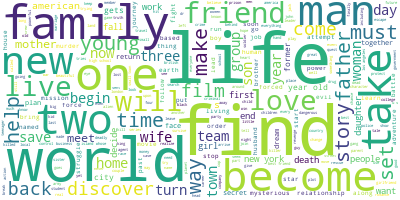

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(list_of_reviews.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
from pyLDAvis import gensim

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
#data = list_of_reviews.values.tolist()
data_words = list(sent_to_words(list_of_reviews))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['nd', 'century', 'paraplegic', 'marine', 'dispatched', 'moon', 'pandora', 'unique', 'mission', 'becomes', 'torn', 'following', 'orders', 'protecting', 'alien', 'civilization']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.008*"life" + 0.006*"one" + 0.005*"new" + 0.004*"love" + 0.004*"family" + '
  '0.004*"school" + 0.003*"town" + 0.003*"years" + 0.003*"high" + '
  '0.003*"father"'),
 (1,
  '0.007*"life" + 0.006*"one" + 0.006*"young" + 0.003*"school" + 0.003*"girl" '
  '+ 0.003*"man" + 0.003*"friends" + 0.003*"two" + 0.003*"lives" + '
  '0.003*"time"'),
 (2,
  '0.008*"film" + 0.005*"world" + 0.005*"love" + 0.004*"one" + 0.004*"family" '
  '+ 0.004*"story" + 0.004*"life" + 0.004*"new" + 0.003*"two" + 0.003*"year"'),
 (3,
  '0.007*"new" + 0.006*"life" + 0.005*"family" + 0.004*"man" + 0.004*"three" + '
  '0.004*"town" + 0.003*"father" + 0.003*"world" + 0.003*"love" + '
  '0.003*"lives"'),
 (4,
  '0.005*"young" + 0.005*"two" + 0.004*"new" + 0.004*"must" + 0.004*"old" + '
  '0.004*"world" + 0.004*"man" + 0.003*"back" + 0.003*"story" + '
  '0.003*"family"'),
 (5,
  '0.007*"man" + 0.005*"two" + 0.004*"young" + 0.004*"family" + 0.004*"world" '
  '+ 0.004*"story" + 0.003*"one" + 0.003*"film" + 0.003*"sc

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3099422499594456


In [ ]:
import pyLDAvis
from pyLDAvis import gensim

In [ ]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.010681 -0.012002       1        1  13.216683
4      0.061539  0.023240       2        1  12.854996
8      0.023452 -0.009621       3        1  10.468240
7      0.013691  0.004379       4        1  10.320013
2     -0.037453  0.050413       5        1  10.034823
5      0.045017  0.002796       6        1   9.612783
0     -0.085921  0.026384       7        1   8.794190
3      0.018226  0.047243       8        1   8.690451
1     -0.039691 -0.064949       9        1   8.618570
6      0.011820 -0.067884      10        1   7.389252, topic_info=       Term        Freq       Total Category  logprob  loglift
26     life  715.000000  715.000000  Default  30.0000  30.0000
1148   film  417.000000  417.000000  Default  29.0000  29.0000
82      new  617.000000  617.000000  Default  28.0000  28.0000
1213  three  222.000000  222.000000  Default  27.0000  27.0000
119   world  496.000000  496.000000  Default  26.0000  26.0000
...     ...         ...         ...      ...      ...      ...
1136   take   18.035050  196.248944  Topic10  -6.3807   0.2181
673     two   21.077616  513.133576  Topic10  -6.2248  -0.5872
1148   film   19.918232  417.770668  Topic10  -6.2814  -0.4382
521    high   18.246286  234.084596  Topic10  -6.3691   0.0534
239    year   18.247476  325.735072  Topic10  -6.3690  -0.2769

[887 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
20208      7  0.832396   abandon
4147       1  0.364631  accident
4147       2  0.095955  accident
4147       3  0.057573  accident
4147       4  0.076764  accident
...      ...       ...       ...
19285     10  0.776288      zira
20468      7  0.946561     zohre
2559       1  0.391197       zoo
2559       6  0.048900       zoo
2559       8  0.488996       zoo

[2442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 9, 8, 3, 6, 1, 4, 2, 7])

In [ ]:
from gensim.corpora.dictionary import Dictionary
topics = [ ['life', 'one', 'old', 'get','year'],
           ['young', 'two', 'never', 'must', 'old'],
           ['new', 'two', 'world', 'town', 'young'],
           ['one', 'young', 'find', 'life', 'new'],
          ['film', 'world', 'love', 'one', 'family'],
          ['man', 'two', 'young', 'family', 'world'],
          ['life', 'one', 'new', 'love', 'family'],
          ['never', 'life', 'family', 'man', 'third'],
          ['life', 'one', 'young', 'school', 'girl'],
          ['life', 'find', 'world', 'man', 'one'],
          ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( texts )

# Coherence model
cm = CoherenceModel(topics=topics,
                    texts=texts,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic1 = cm.get_coherence_per_topic()
coherence_per_topic1

[0.49698257425953696,
 0.39026194544778015,
 0.3461619216676538,
 0.36931587054383536,
 0.3920357067016036,
 0.3829795400327649,
 0.42391734822373517,
 0.3799802526369409,
 0.46147723952724984,
 0.39529423809920183]

LSI Model

In [ ]:
def compute_coherence_values(id2word, corpus, data_words, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(corpus, num_topics=10, id2word = id2word)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

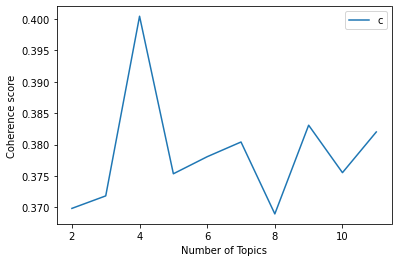

In [ ]:
from gensim.models.lsimodel import LsiModel
import matplotlib.pyplot as plt
def plot_graph(data_words,start, stop, step):
    id2word,corpus
    model_list, coherence_values = compute_coherence_values(id2word, corpus,data_words,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
plot_graph(data_words,start,stop,step)

In [ ]:
from gensim.models.lsimodel import LsiModel
lsi_model = LsiModel(corpus=corpus, num_topics=10, id2word=id2word)
lsi_model.show_topics(num_topics=10)

[(0,
  '0.298*"life" + 0.242*"one" + 0.230*"new" + 0.186*"world" + 0.183*"young" + 0.180*"man" + 0.166*"family" + 0.156*"two" + 0.135*"find" + 0.133*"love"'),
 (1,
  '0.797*"life" + -0.289*"one" + -0.269*"world" + -0.104*"find" + -0.103*"two" + 0.102*"love" + 0.089*"family" + -0.086*"war" + -0.080*"must" + -0.072*"team"'),
 (2,
  '0.672*"new" + -0.525*"one" + 0.248*"york" + 0.153*"city" + -0.136*"life" + 0.133*"family" + -0.122*"two" + -0.111*"story" + -0.090*"film" + 0.089*"old"'),
 (3,
  '-0.453*"new" + -0.397*"one" + 0.382*"young" + 0.355*"man" + 0.245*"family" + -0.237*"life" + -0.175*"york" + 0.161*"father" + 0.118*"world" + 0.096*"old"'),
 (4,
  '-0.685*"world" + 0.296*"family" + -0.235*"life" + -0.176*"war" + 0.162*"father" + 0.147*"one" + -0.142*"story" + 0.141*"town" + 0.140*"school" + 0.123*"two"'),
 (5,
  '0.602*"man" + 0.344*"young" + -0.304*"family" + -0.243*"world" + -0.222*"old" + -0.200*"year" + 0.195*"new" + 0.152*"one" + 0.131*"woman" + 0.113*"york"'),
 (6,
  '0.452*"

In [ ]:
from gensim.corpora.dictionary import Dictionary
topics = [ ['life', 'one', 'new', 'world','young'],
           ['life', 'one', 'world', 'find', 'two'],
           ['new', 'one', 'york', 'city', 'life'],
           ['new', 'one', 'young', 'man', 'family'],
          ['world', 'family', 'life', 'war', 'father'],
          ['man', 'young', 'family', 'world', 'old'],
          ['family', 'film', 'story', 'must', 'young'],
          ['one', 'two', 'family', 'man', 'film'],
          ['two', 'school', 'family', 'young', 'old'],
          ['young', 'man', 'film', 'story', 'two'],
          ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( texts )

# Coherence model
cm = CoherenceModel(topics=topics,
                    texts=texts,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic2 = cm.get_coherence_per_topic()
coherence_per_topic2

[0.3715171232349448,
 0.38462121903536217,
 0.5636993150594601,
 0.41833028053030696,
 0.41913584344730437,
 0.4270490886387398,
 0.3517971242578398,
 0.3844449948373078,
 0.38301795477164075,
 0.41470993807352113]

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)


Coherence Score:  0.38168469383567627


In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate
table = [['Coherence Score using LDA', 'Coherence Score using LSA'], [coherence_per_topic1[0], coherence_per_topic2[0]],
         [coherence_per_topic1[1], coherence_per_topic2[1]],[coherence_per_topic1[2], coherence_per_topic2[2]],[coherence_per_topic1[3], coherence_per_topic2[3]],
         [coherence_per_topic1[4], coherence_per_topic2[4]],[coherence_per_topic1[5], coherence_per_topic2[5]],[coherence_per_topic1[6], coherence_per_topic2[6]],
         [coherence_per_topic1[7], coherence_per_topic2[7]],[coherence_per_topic1[8], coherence_per_topic2[8]],[coherence_per_topic1[9], coherence_per_topic2[9]]
         ]

print(tabulate(table, headers='keys', tablefmt='fancy_grid',showindex=True))

╒════╤═══════════════════════════╤═══════════════════════════╕
│    │ 0                         │ 1                         │
╞════╪═══════════════════════════╪═══════════════════════════╡
│  0 │ Coherence Score using LDA │ Coherence Score using LSA │
├────┼───────────────────────────┼───────────────────────────┤
│  1 │ 0.49698257425953696       │ 0.3715171232349448        │
├────┼───────────────────────────┼───────────────────────────┤
│  2 │ 0.39026194544778015       │ 0.38462121903536217       │
├────┼───────────────────────────┼───────────────────────────┤
│  3 │ 0.3461619216676538        │ 0.5636993150594601        │
├────┼───────────────────────────┼───────────────────────────┤
│  4 │ 0.36931587054383536       │ 0.41833028053030696       │
├────┼───────────────────────────┼───────────────────────────┤
│  5 │ 0.3920357067016036        │ 0.41913584344730437       │
├────┼───────────────────────────┼───────────────────────────┤
│  6 │ 0.3829795400327649        │ 0.4270490886387398  

In [ ]:
table2 = [['LDA Model Coherence','LSA Model Coherence'],[coherence_lda,coherence_lsi]]
print(tabulate(table2, headers='keys', tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════╤═════════════════════╕
│    │ 0                   │ 1                   │
╞════╪═════════════════════╪═════════════════════╡
│  0 │ LDA Model Coherence │ LSA Model Coherence │
├────┼─────────────────────┼─────────────────────┤
│  1 │ 0.3099422499594456  │ 0.38168469383567627 │
╘════╧═════════════════════╧═════════════════════╛
